# Overview {.smaller}

## Current Situation {.smaller}

::: {.incremental}

* Rising Prices

    Despite government efforts to stabilize fuel costs, gasoline prices in Mexico have been on the rise. Some estimates suggest prices could reach MX$30 per liter during 2025.

* Regional Variations

    Gasoline prices vary significantly across different states in Mexico. Quintana Roo has the highest average price for regular gasoline, while Veracruz has the lowest.

* Government Intervention

    The government has implemented measures like a price cap of MX$24 per liter for regular gasoline and has been working to stabilize fuel prices. However, these efforts have faced challenges.

:::

## Factors Affecting Prices {.smaller}

::: {.incremental}

* Global Oil Prices

    International oil prices play a significant role in determining gasoline prices in Mexico.

* Government Policies

    Taxes, subsidies, and regulations implemented by the Mexican government influence fuel prices.

* Economic Conditions

    Inflation, exchange rates, and other economic factors can impact gasoline prices.

:::

## Challenges and Concerns {.smaller}

* Impact on Low-Income Families

    Rising gasoline prices put a strain on low-income households, affecting their daily expenses and overall economic well-being.

* Economic Impact

    Increased fuel costs can have a ripple effect across various sectors of the economy, potentially leading to inflation and affecting businesses.

* Government Promises

    The government’s promises to keep gasoline prices low have been met with skepticism, as prices continue to climb.

In [1]:
import polars as pl
import duckdb as db
from plotnine import *

In [2]:
conn = db.connect('my_database.db')

In [3]:
df = conn.sql('select * from gas_stations').pl()

In [4]:
conn.close()

In [5]:
df = (
    df.select('entidad'
              , 'municipio'
              , 'precio_tar'
              , 'precio_vendedores'
              , 'ganancia')
        .rename({
            'entidad':'state',
            'municipio':'municipality',
            'precio_tar':'gasoline_cost',
            'precio_vendedores':'sale_price',
            'ganancia':'profit',
        })
).with_columns(
    (pl.col('profit')/pl.col('gasoline_cost')).alias('profit%'),
    mun_state=pl.col('municipality')+', '+pl.col('state')
)

In [6]:
states = (
        df.group_by('state')
            .agg(pl.col('gasoline_cost','sale_price','profit', 'profit%').mean())
            .sort('state')
        )

In [7]:
municipalities = (
        df.group_by('mun_state')
            .agg(pl.col('gasoline_cost','sale_price','profit','profit%').mean())
            .sort('mun_state')
        )

## Top 05 States with highest gasoline prices {.smaller}

The following table presents a snapshot of the States with highest gasoline prices in Mexico.

In [8]:
#| label: tbl-top5-states
#| tbl-cap: "Top 05 States with highest prices"
#| tbl-cap-location: bottom

(
    states
        .top_k(5, by='sale_price')
        .to_pandas()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

state,gasoline_cost,sale_price,profit,profit%
QUINTANA ROO,$21.46,$24.80,$3.34,15.55%
YUCATAN,$21.46,$24.79,$3.33,15.52%
NAYARIT,$22.54,$24.76,$2.23,9.90%
GUERRERO,$22.37,$24.76,$2.39,10.67%
SINALOA,$22.36,$24.72,$2.36,10.59%


## Top 05 States with lowest gasoline prices {.smaller}

The following table presents a snapshot of the States with lowest gasoline prices in Mexico.

In [9]:
#| label: tbl-bottom5-states
#| tbl-cap: "Top 05 States with lowest prices"
#| tbl-cap-location: bottom
(
    states
        .bottom_k(5, by='sale_price')
        .to_pandas()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

state,gasoline_cost,sale_price,profit,profit%
TAMAULIPAS,$21.22,$23.10,$1.87,8.79%
COAHUILA DE ZARAGOZA,$22.25,$23.12,$0.87,4.01%
CHIHUAHUA,$21.47,$23.36,$1.89,8.90%
NUEVO LEON,$21.41,$23.40,$1.99,9.32%
VERACRUZ DE IGNACIO DE LA LLAVE,$21.59,$23.44,$1.86,8.62%


## Top 05 Municipalities with highest gasoline prices {.smaller}

The following table presents a snapshot of the Municipalities with highest gasoline prices in Mexico.

In [10]:
#| label: tbl-top5-municipalitites
#| tbl-cap: "Top 05 Municipalities with highest prices"
#| tbl-cap-location: bottom

(
    municipalities
        .top_k(5, by='sale_price')
        .to_pandas()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

mun_state,gasoline_cost,sale_price,profit,profit%
"NUEVA ITALIA, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%
"ZIRACUARETIRO, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%
"GABRIEL ZAMORA, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%
"HUIRAMBA, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%
"NAHUATZEN, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%


## Top 05 Municipalities with lowest gasoline prices {.smaller}

The following table presents a snapshot of the Municipalities with lowest gasoline prices in Mexico.

In [11]:
#| label: tbl-bottom5-municipalitites
#| tbl-cap: "Top 05 Municipalities with lowest prices"
#| tbl-cap-location: bottom

(
    municipalities
        .bottom_k(5, by='sale_price')
        .to_pandas()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

mun_state,gasoline_cost,sale_price,profit,profit%
"ANAHUAC, NUEVO LEON",$20.57,$20.74,$0.17,0.84%
"CD. GUERRERO, TAMAULIPAS",$20.57,$20.74,$0.17,0.84%
"LAMPAZOS DE NARANJO, NUEVO LEON",$20.57,$20.74,$0.17,0.84%
"ALLENDE, COAHUILA DE ZARAGOZA",$22.59,$21.02,$-1.57,-6.94%
"MORELOS, COAHUILA DE ZARAGOZA",$22.59,$21.02,$-1.57,-6.94%


## Average Gasoline Price by State {.smaller}

The following chart shows average gasoline prices by State in Mexico.

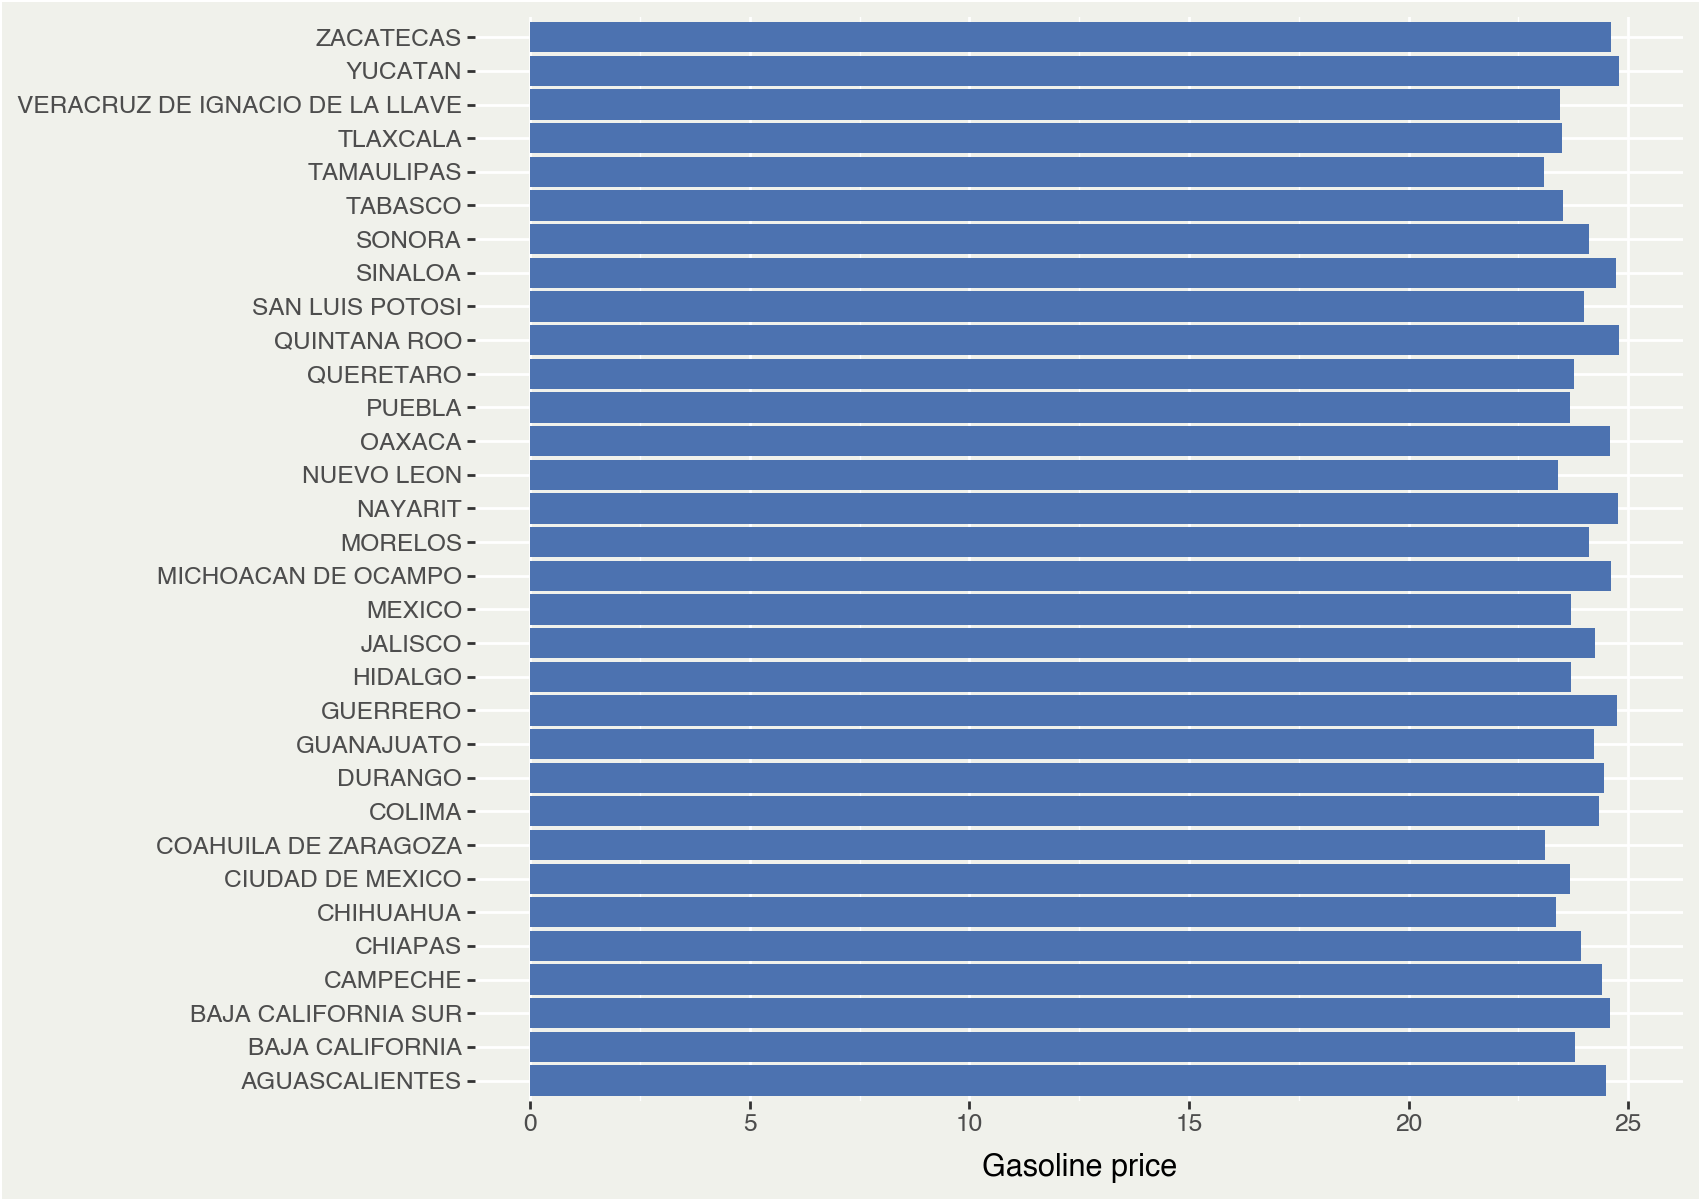

In [25]:
#| label: fig-states
#| fig-cap: "Average Gasoline Prices by State"

(
    ggplot(states, mapping=aes(x='state', y='sale_price'))
        + geom_bar(stat='identity', fill="#4c72b0")
        + coord_flip()
        + scale_y_continuous(limits=(0, 25))
        + labs(x='',
               y='Gasoline price')
        + theme(axis_text_y=element_text(rotation=0),
               figure_size=(8.5, 6),
               plot_background=element_rect(fill='#F0F1EB'),
               panel_background=element_rect(fill='#F0F1EB', alpha=0.6),
               )
)

## Profit by State {.smaller}

The following chart shows average profit by selling gasoline by State in Mexico.

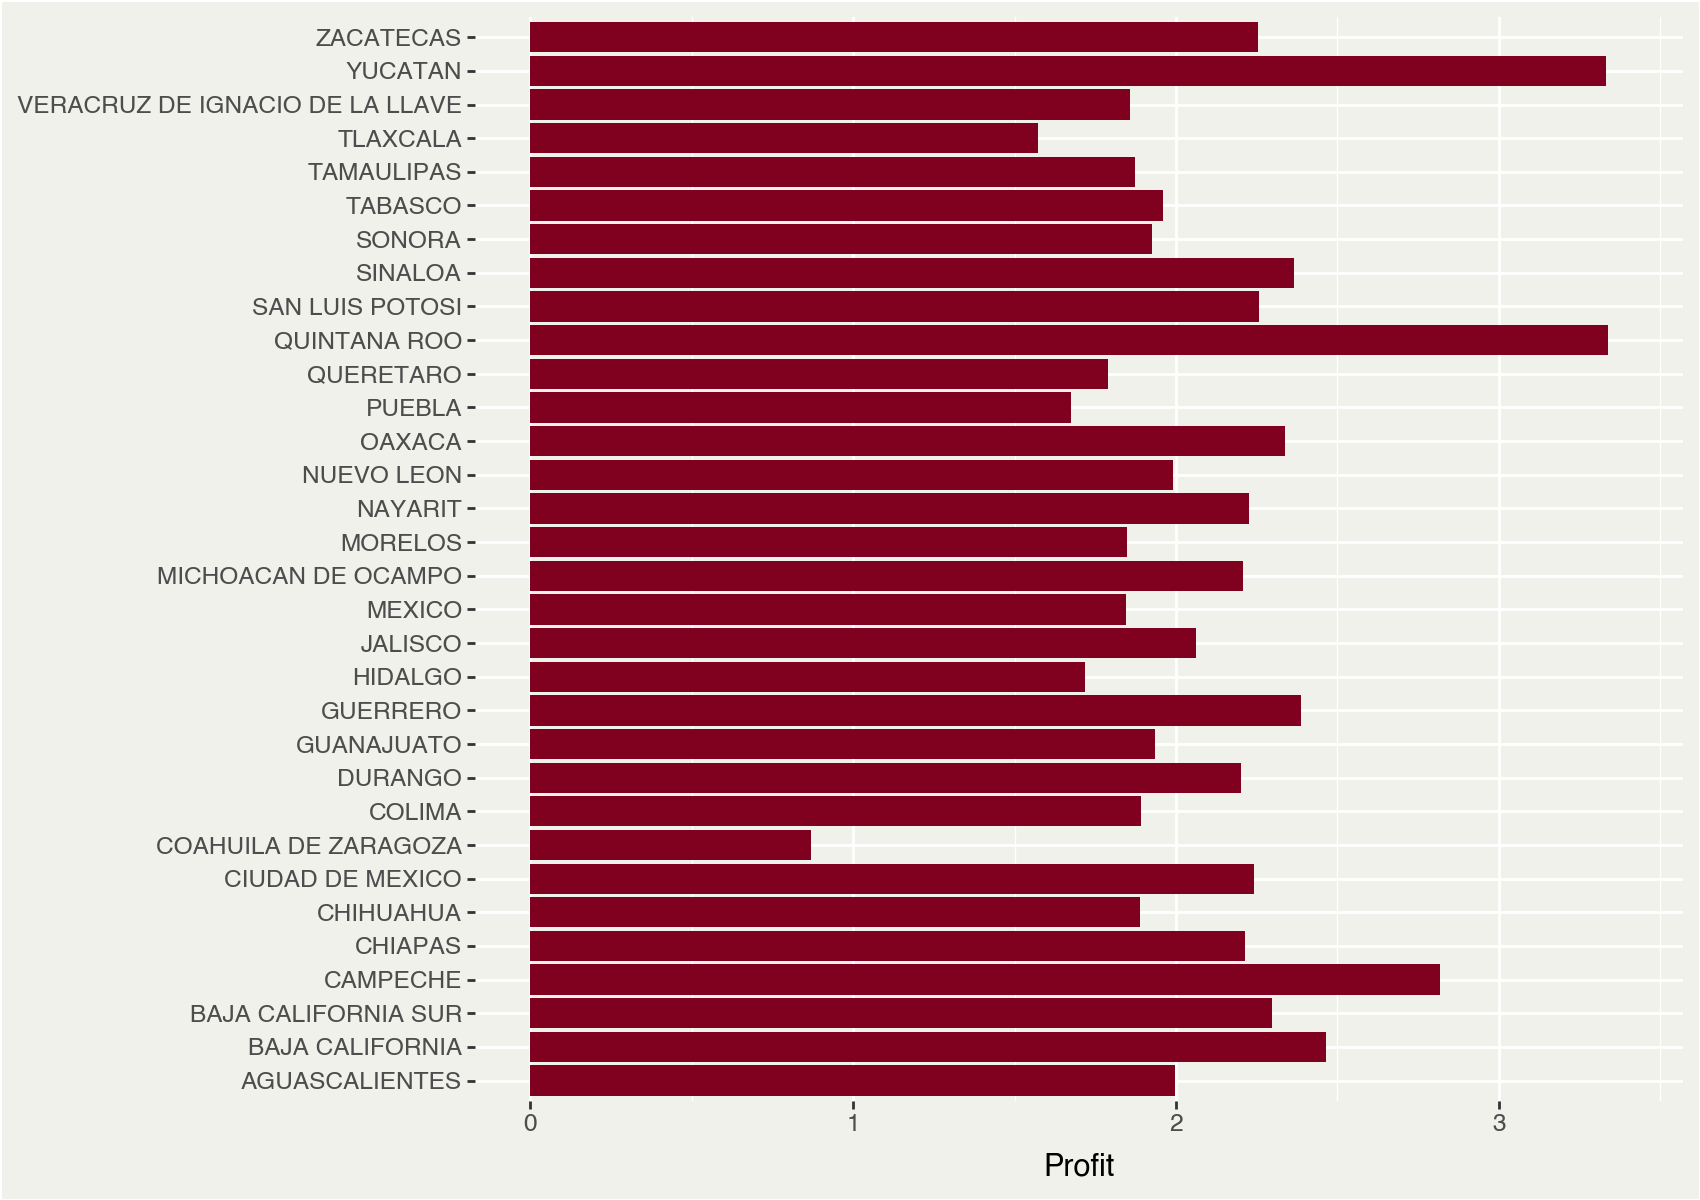

In [26]:
#| label: fig-states-profit
#| fig-cap: "Profit by State"

(
    ggplot(states, mapping=aes(x='state', y='profit'))
        + geom_bar(stat='identity', fill="#800020")
        + coord_flip()
        + scale_y_continuous(limits=(0, 3.4))
        + labs(x='',
               y='Profit')
        + theme(axis_text_y=element_text(rotation=0),
               figure_size=(8.5, 6),
               plot_background=element_rect(fill='#F0F1EB'),
               panel_background=element_rect(fill='#F0F1EB', alpha=0.6),
               )
)

## Dispersion of Gasoline Prices {.smaller}

The following chart shows the dispersion of gasoline prices by State in Mexico.

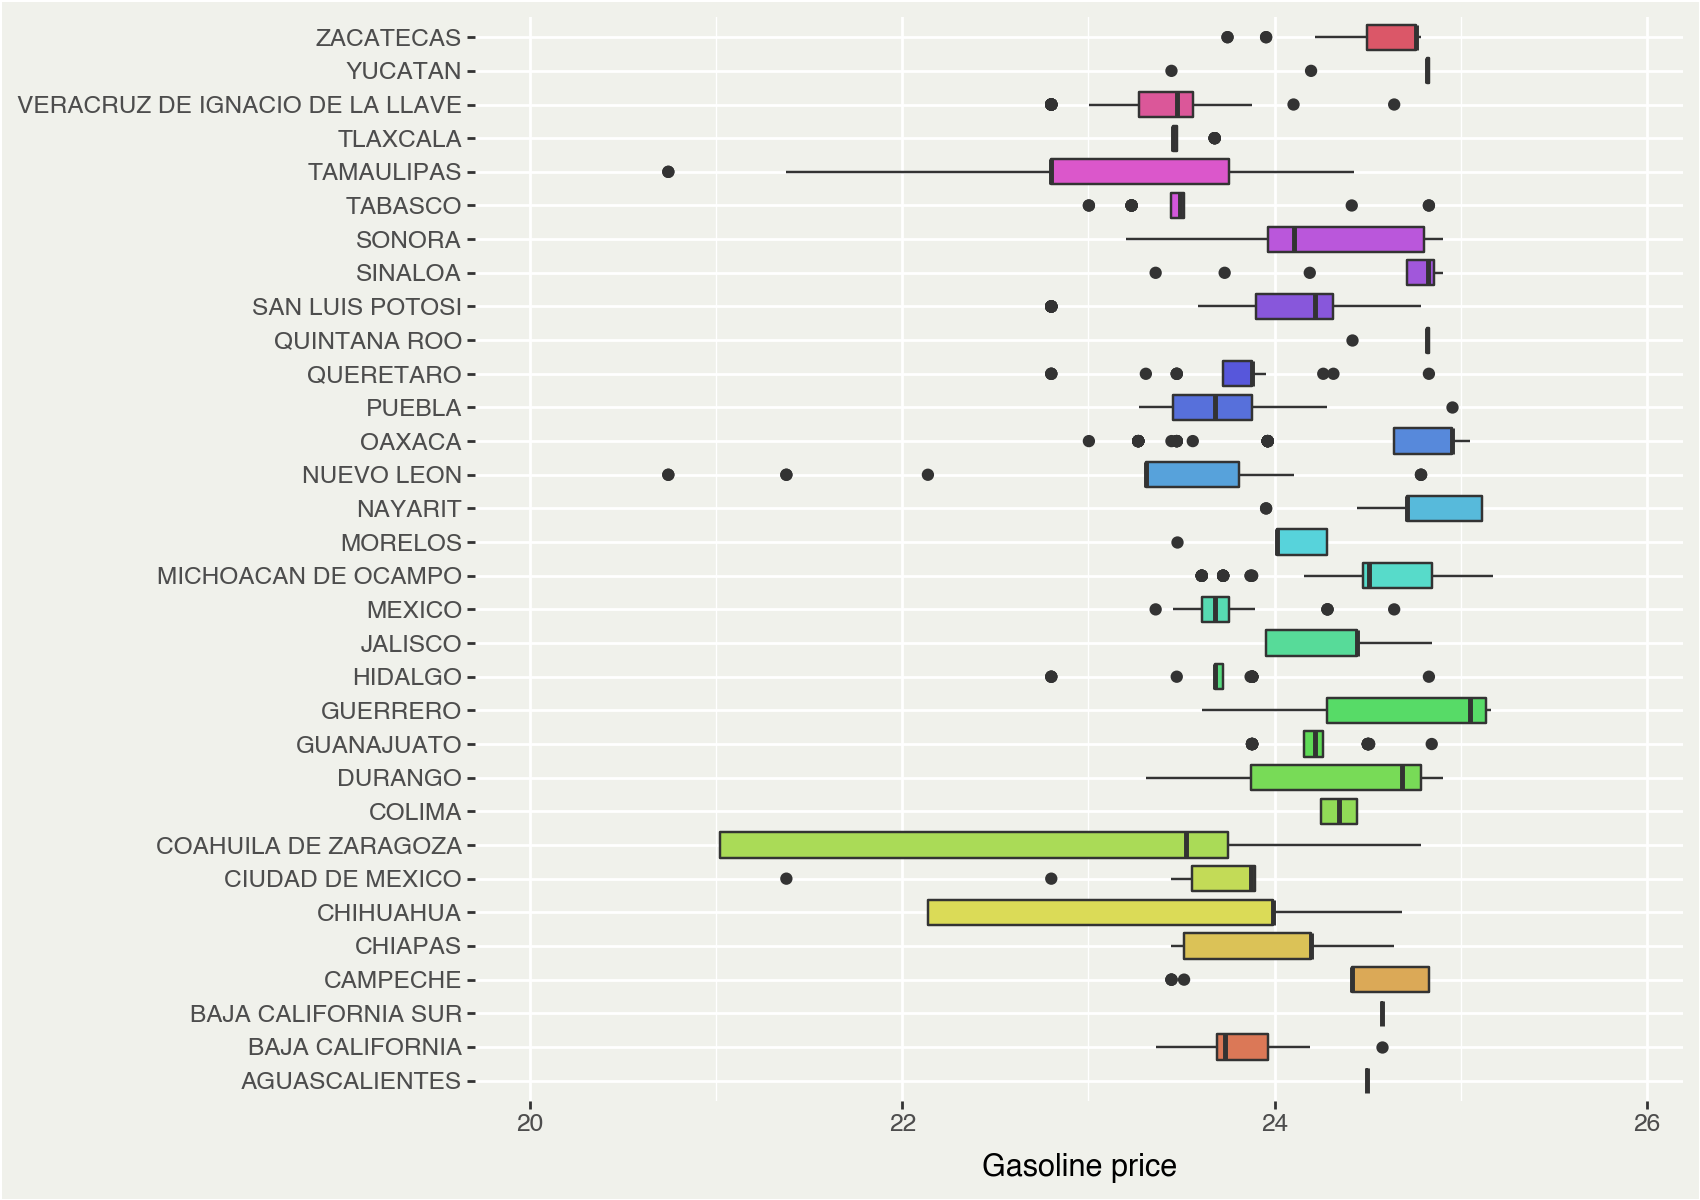

In [27]:
#| label: fig-municipalities
#| fig-cap: "Dispersion of Gasoline Prices by State"

(
    ggplot(data=df, mapping=aes(x='state', y='sale_price', fill='state')) 
    + geom_boxplot()
    + coord_flip()
    + scale_y_continuous(limits=(20, 25.9))
    + labs(x='',
           y='Gasoline price')
    + theme(legend_position='none',
           figure_size=(8.5, 6),
           plot_background=element_rect(fill='#F0F1EB'),
               panel_background=element_rect(fill='#F0F1EB', alpha=0.6),
           )
)

## Dispersion of Profits {.smaller}

The following chart shows the dispersion of profit by selling gasoline by State in Mexico.

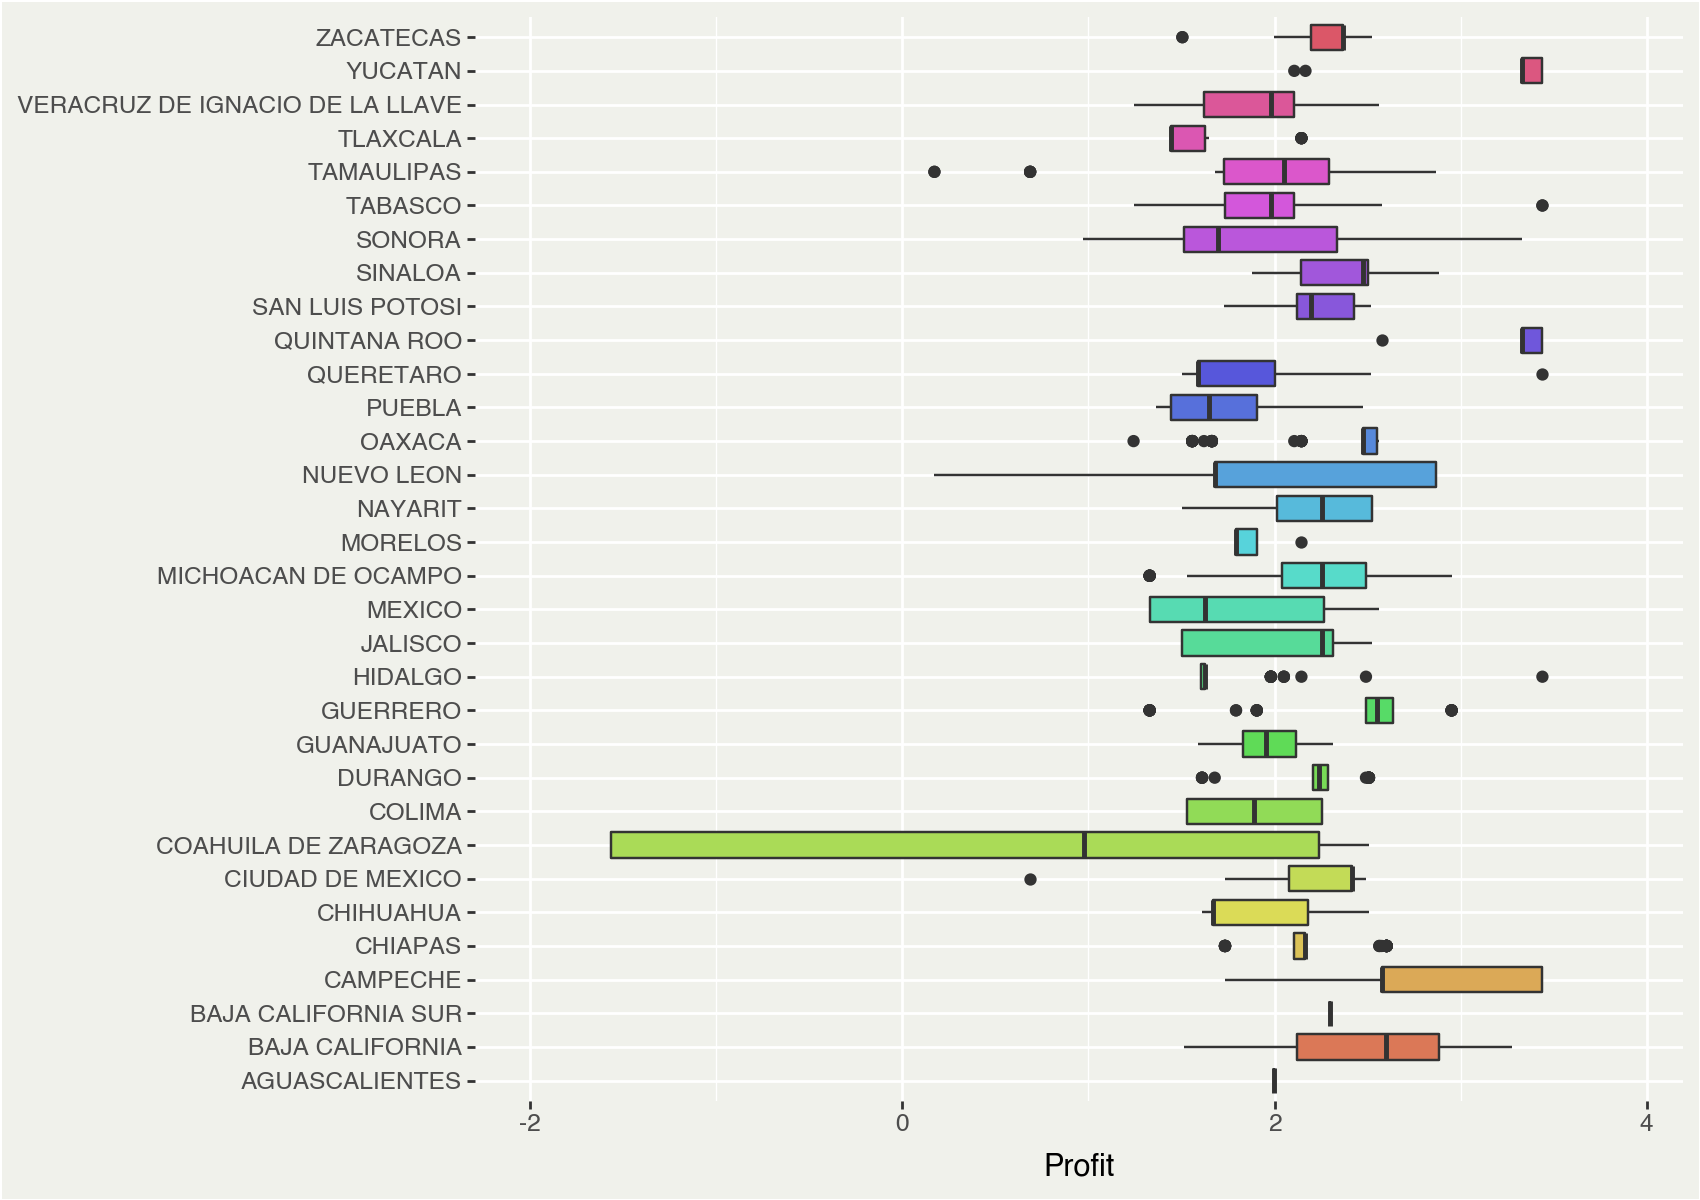

In [28]:
#| label: fig-municipalities-profit
#| fig-cap: "Dispersion of Profits by State"

(
    ggplot(data=df, mapping=aes(x='state', y='profit', fill='state')) 
    + geom_boxplot()
    + coord_flip()
    + scale_y_continuous(limits=(-2, 3.9))
    + labs(x='',
           y='Profit')
    + theme(legend_position='none',
           figure_size=(8.5, 6),
           plot_background=element_rect(fill='#F0F1EB'),
           panel_background=element_rect(fill='#F0F1EB', alpha=0.6),
           )
)

## Geographical Distribution {.smaller}

::: {#fig-datawrapper}
```{=html}
<iframe width="850" height="700" src="https://datawrapper.dwcdn.net/gXnz2/2/" title="Datawrapper chart" data-external="1"></iframe>
```
Gasoline Sale Prices by State in Mexico
:::

# Conclusions {.smaller}

In most states, filling a 40-liter car tank costs around $1,000 pesos.

While precise price predictions are difficult, it's reasonable to expect continued volatility in gasoline prices in Mexico during 2025.

The interplay of global oil markets, government policies, and domestic economic conditions will create a dynamic environment.
Consumers should be prepared for potential price fluctuations and consider strategies for managing their fuel expenses.

The energy sector, meanwhile, will be closely watched as Mexico navigates the complex challenges of ensuring affordable and accessible fuel for its population. 

The future of gasoline prices in Mexico remains uncertain, but one thing is clear: it will continue to be a topic of significant importance for both consumers and policymakers.

# Contact {.smaller}

**Jesus L. Monroy**


*Economist & Data Scientist*

[Medium](https://medium.com/@jesus_lmonroy) | [Linkedin](https://www.linkedin.com/in/j3sus-lmonroy) | [Twitter](https://www.twitter.com/sqlalchemist)